In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
d = tf.keras.datasets.cifar10

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = d.load_data()

In [4]:
print(x_train_full.shape)
print( y_test.shape)

(50000, 32, 32, 3)
(10000, 1)


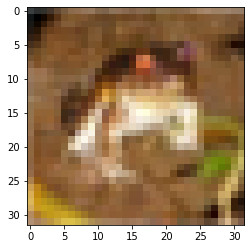

In [5]:
plt.imshow(x_train_full[0],cmap = 'binary')
plt.show()


In [6]:
y_train_full[0]

array([6], dtype=uint8)

In [7]:
(x_valid,x_train) = x_train_full[:5000]/255,x_train_full[5000:]/255 
(y_valid,y_train) = y_train_full[:5000],y_train_full[5000:]

In [8]:
LAYERS = [tf.keras.layers.Flatten(input_shape = [32,32,3]),
          tf.keras.layers.Dense(300,activation = 'relu'),
          tf.keras.layers.Dropout(.2),
         tf.keras.layers.Dense(200,activation = 'relu'),
          tf.keras.layers.Dropout(.2),
         tf.keras.layers.Dense(100,activation = 'relu'),
          tf.keras.layers.Dropout(.2),
         tf.keras.layers.Dense(50,activation = 'relu'),
          tf.keras.layers.Dropout(.2),
         tf.keras.layers.Dense(10,activation = 'softmax')]
model_clf = tf.keras.models.Sequential(LAYERS)

In [9]:
print(model_clf.layers)
model_clf.summary()

[<tensorflow.python.keras.layers.core.Flatten object at 0x000002E02EE06F70>, <tensorflow.python.keras.layers.core.Dense object at 0x000002E02EE35820>, <tensorflow.python.keras.layers.core.Dropout object at 0x000002E02EE35B50>, <tensorflow.python.keras.layers.core.Dense object at 0x000002E02EE35D30>, <tensorflow.python.keras.layers.core.Dropout object at 0x000002E02EE35370>, <tensorflow.python.keras.layers.core.Dense object at 0x000002E02EE78220>, <tensorflow.python.keras.layers.core.Dropout object at 0x000002E02EE78580>, <tensorflow.python.keras.layers.core.Dense object at 0x000002E02EE78730>, <tensorflow.python.keras.layers.core.Dropout object at 0x000002E02EE78A90>, <tensorflow.python.keras.layers.core.Dense object at 0x000002E02EE78C40>]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_______________________________

In [10]:
model_clf.compile(optimizer='SGD',
    loss= tf.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy'],)

In [11]:
valid = (x_valid,y_valid)

history_with_dropout = model_clf.fit(x_train , y_train , validation_data = valid , epochs = 50 )

Epoch 1/50
1407/1407 [==============================] - 5s 4ms/step - loss: 2.1003 - accuracy: 0.2179 - val_loss: 1.9407 - val_accuracy: 0.2888
Epoch 2/50
1407/1407 [==============================] - 5s 4ms/step - loss: 1.9353 - accuracy: 0.2892 - val_loss: 1.8237 - val_accuracy: 0.3388
Epoch 3/50
1407/1407 [==============================] - 5s 3ms/step - loss: 1.8643 - accuracy: 0.3243 - val_loss: 2.1881 - val_accuracy: 0.2300
Epoch 4/50
1407/1407 [==============================] - 5s 3ms/step - loss: 1.8111 - accuracy: 0.3446 - val_loss: 1.7067 - val_accuracy: 0.3818
Epoch 5/50
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7715 - accuracy: 0.3645 - val_loss: 1.6686 - val_accuracy: 0.4058
Epoch 6/50
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7303 - accuracy: 0.3801 - val_loss: 1.6694 - val_accuracy: 0.4040
Epoch 7/50
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6999 - accuracy: 0.3922 - val_loss: 1.6721 - val_accuracy:

In [12]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 138.7779 - accuracy: 0.4126


[138.77789306640625, 0.41260001063346863]

In [13]:
pd.DataFrame(history_with_dropout.history).head()

,loss,accuracy,val_loss,val_accuracy
0,2.100335,0.217911,1.940686,0.2888
1,1.935322,0.289178,1.823722,0.3388
2,1.864332,0.324333,2.188129,0.2300
3,1.811056,0.344578,1.706720,0.3818
4,1.771523,0.364467,1.668605,0.4058


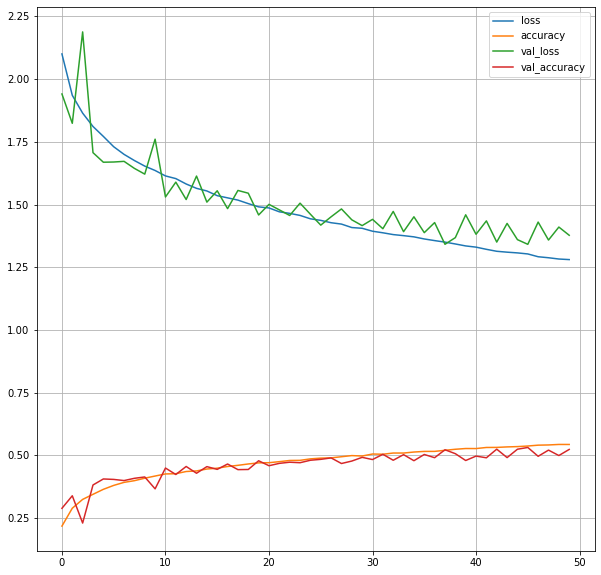

In [14]:
pd.DataFrame(history_with_dropout.history).plot(figsize=(10,10))
plt.grid(True)

plt.show()

In [15]:
y_pred =  model_clf.predict(x_test)
y_pred[0].round()

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_test[0]

array([3], dtype=uint8)